In [1]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')
  incolab = True  
else:
  incolab = False 

%load_ext autoreload
%autoreload 2

In [2]:
# First import pandas and the model into the  workspace
# There is no problem importing the same library multiple times. 
# After the first import there is not any significant penalty for additional mports 
import pandas as pd

from modelclass import model 
# functions that improve rendering of modelflow outputs under Jupyter Notebook
model.widescreen()
model.scroll_off()




In [3]:
# Create a dataframe using standard pandas

df = pd.DataFrame({'B': [1,1,1,1],'C':[1,2,3,6],'E':[4,4,4,4]},index=[2018,2019,2020,2021])
df 

,B,C,E
2018,1,1,4
2019,1,2,4
2020,1,3,4
2021,1,6,4


In [4]:
#define the number of years for which the data is to be created.
number_of_rows = 6 

# call the dataframe constructor
df = pd.DataFrame(100,
       index=[2020+v for v in range(number_of_rows)], # create row index
       # equivalent to index=[2020,2021,2022,2023,2024,2025] 
       columns=['A','B'])                                 # create column name 
df

df1 = pd.DataFrame(200,
       index=[v for v in range(2020,2030)], # create row index
       # equivalent to index=[2020,2021,...,2030] 
       columns=['A1','B1'])                                 # create column name 
df1

,A1,B1
2020,200,200
2021,200,200
2022,200,200
2023,200,200
2024,200,200
2025,200,200
2026,200,200
2027,200,200
2028,200,200
2029,200,200


In [5]:
df2=df.upd('c = 142') 
df2

,A,B,C
2020,100,100,142.0
2021,100,100,142.0
2022,100,100,142.0
2023,100,100,142.0
2024,100,100,142.0
2025,100,100,142.0


In [6]:
df.upd("""
# Same number of values as years
<2021 2024> A = 42 44 45 46    # 4 years
<2020     > B = 200            # 1 year 
c = 500                        # Same period as previous line
<-0 -1> D = 33                   # All years 
""")

,A,B,C,D
2020,100,200,500.0,33.0
2021,42,100,0.0,33.0
2022,44,100,0.0,33.0
2023,45,100,0.0,33.0
2024,46,100,0.0,33.0
2025,100,100,0.0,33.0


In [7]:
df.upd("""
# Same number of values as years
<2021 2024> A = 42 44 45 46    # 4 years
<2023     > B = 200            # 1 year 
c = 500
""")

,A,B,C
2020,100,100,0.0
2021,42,100,0.0
2022,44,100,0.0
2023,45,200,500.0
2024,46,100,0.0
2025,100,100,0.0


In [8]:
df.upd('''
# Or one number to all years in between start and end 
<2022 2024> B  +  42    # one value broadcast to 3 years 
''')

,A,B
2020,100,100
2021,100,100
2022,100,142
2023,100,142
2024,100,142
2025,100,100


In [9]:
df.upd('''
# Same number of values as years
<2021 2023> A *  42 44 55
''')

,A,B
2020,100,100
2021,4200,100
2022,4400,100
2023,5500,100
2024,100,100
2025,100,100


In [10]:
df.upd('''
<2021 2022 > A %  42 44   
<-0 -1> B % 10            # all rows 
C = 100                   # all rows persist 
<2023 2025> C % -12       # now only for 3 years 
''')

,A,B,C
2020,100,110.0,100.0
2021,142,110.0,100.0
2022,144,110.0,100.0
2023,100,110.0,88.0
2024,100,110.0,88.0
2025,100,110.0,88.0


In [11]:
res = df.upd('''
# Same number of values as years
<2021 2022> A =GROWTH  1 5  
<2020> c = 100 
<2021 2025> c =GROWTH 2 
''')
print(f'Dataframe:\n{res}\n\nGrowth:\n{res.pct_change()*100}\n') # Explained b

Dataframe:
           A    B           C
2020  100.00  100  100.000000
2021  101.00  100  102.000000
2022  106.05  100  104.040000
2023  100.00  100  106.120800
2024  100.00  100  108.243216
2025  100.00  100  110.408080

Growth:
             A    B    C
2020       NaN  NaN  NaN
2021  1.000000  0.0  2.0
2022  5.000000  0.0  2.0
2023 -5.704856  0.0  2.0
2024  0.000000  0.0  2.0
2025  0.000000  0.0  2.0



In [12]:
res =df.upd('''
<2021 > A =GROWTH  1  # All selected years set to the same growth rate
a +growth   2  # Add to the existing growth rate these numbers  
''')
print(f'Dataframe:\n{res}\n\nGrowth:\n{res.pct_change()*100}\n')

Dataframe:
        A    B
2020  100  100
2021  103  100
2022  100  100
2023  100  100
2024  100  100
2025  100  100

Growth:
             A    B
2020       NaN  NaN
2021  3.000000  0.0
2022 -2.912621  0.0
2023  0.000000  0.0
2024  0.000000  0.0
2025  0.000000  0.0



In [13]:
df.upd('''
< 2021 2022> A =diff  2 4   # Same number of values as years
<2020 > UpBy2 = 100 # sets rows equal to the same  number for all years in between start and end 
<2021 2025> UpBy2 =diff  2  

''')

,A,B,UPBY2
2020,100,100,100.0
2021,102,100,102.0
2022,106,100,104.0
2023,100,100,106.0
2024,100,100,108.0
2025,100,100,110.0


In [14]:
df

,A,B
2020,100,100
2021,100,100
2022,100,100
2023,100,100
2024,100,100
2025,100,100


In [15]:
df = pd.DataFrame(100,
       index=[2020+v for v in range(number_of_rows)], # create row index
       # equivalent to index=[2020,2021,2022,2023,2024,2025] 
       columns=['A','B']) 

df=df.upd("""<2021 -1> A =growth 2
           <2020 -1>   B = 110
          <2021 -1>    B =growth 2
          """)
# Store these variables for later use in comparisons
df['A_ORIG']=df['A']
df['B_ORIG']=df['B']
df


,A,B,A_ORIG,B_ORIG
2020,100.000000,110.000000,100.000000,110.000000
2021,102.000000,112.200000,102.000000,112.200000
2022,104.040000,114.444000,104.040000,114.444000
2023,106.120800,116.732880,106.120800,116.732880
2024,108.243216,119.067538,108.243216,119.067538
2025,110.408080,121.448888,110.408080,121.448888


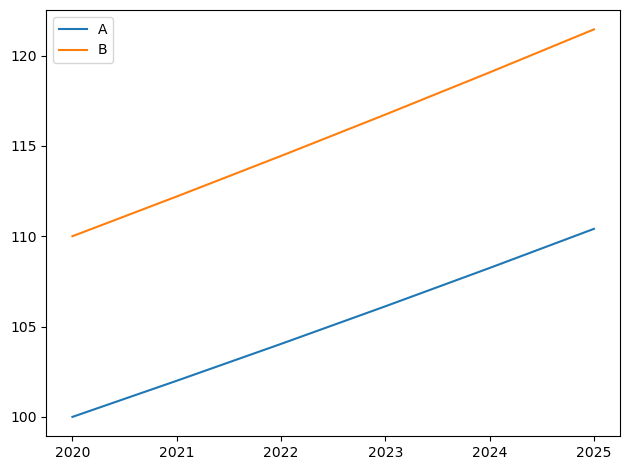

In [16]:
df[['A','B']].plot();

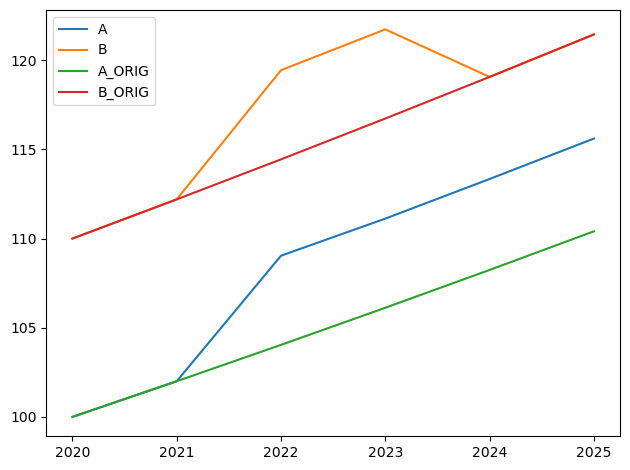

In [17]:
df=df.upd("""
            <2022 2023> A + 5 --kg
            <2022 2023> B + 5 --nkg
            """)

df[['A','B','A_ORIG','B_ORIG']].plot();
    

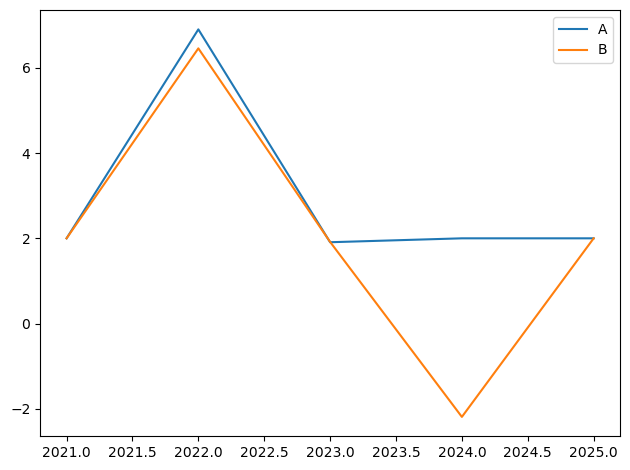

In [18]:
dfg=df[['A','B']].pct_change()*100
dfg.plot();

In [19]:

# instantiate a new dataframe with one column 'A' with value 100 everywhere and index 2020-2025
dftest = pd.DataFrame(100,
       index=[2020+v for v in range(number_of_rows)], # create row index
       # equivalent to index=[2020,2021,2022,2023,2024,2025] 
       columns=['A'])                                 # create column name 

# Update a to have growth rate accelerationg linearly by 1 from 1 percent to 5 percent
original = dftest.upd('<2021 2025> a =growth 1 2 3 4 5')  
print(f'Levels:\n{original}\n\nGrowth:\n{original.pct_change()*100}\n')

Levels:
               A
2020  100.000000
2021  101.000000
2022  103.020000
2023  106.110600
2024  110.355024
2025  115.872775

Growth:
        A
2020  NaN
2021  1.0
2022  2.0
2023  3.0
2024  4.0
2025  5.0



In [20]:
nokg = original.upd('''
<2021 2025>  a =growth 1 2 3 4 5 
<2021 2023>  a = 120  
''',lprint=0)

kg = original.upd('''
<2021 2025>  a =growth 1 2 3 4 5 
<2021 2023>  a = 120  --kg
''',lprint=0)


kg=kg.rename(columns={"A":"KG"})       #rename cols to facilitate display
nokg=nokg.rename(columns={"A":"NOKG"}) #rename cols to facilitate display

combo=pd.concat([kg,nokg], axis=1)
combo


print(f'Levels\n{combo}\n\nGrowth\n{combo.pct_change()*100}')

Levels
          KG        NOKG
2020  100.00  100.000000
2021  120.00  120.000000
2022  120.00  120.000000
2023  120.00  120.000000
2024  124.80  110.355024
2025  131.04  115.872775

Growth
        KG      NOKG
2020   NaN       NaN
2021  20.0  20.00000
2022   0.0   0.00000
2023   0.0   0.00000
2024   4.0  -8.03748
2025   5.0   5.00000


In [21]:
# Create a data frame
dftest = pd.DataFrame(100,
       index=[2020+v for v in range(number_of_rows)], # create row index
       # equivalent to index=[2020,2021,2022,2023,2024,2025] 
       columns=['A','B','C','D','E'])                                 # create column name 
df

,A,B,A_ORIG,B_ORIG
2020,100.000000,110.000000,100.000000,110.000000
2021,102.000000,112.200000,102.000000,112.200000
2022,109.040000,119.444000,104.040000,114.444000
2023,111.120800,121.732880,106.120800,116.732880
2024,113.343216,119.067538,108.243216,119.067538
2025,115.610080,121.448888,110.408080,121.448888


In [22]:
dfres = dftest.upd('''
<2022 2023> c = 200 
<2022 2023> d = 300  
<2022 2023> e = 400  --no_keep_growth 
''',keep_growth=True)  # <=  Set keep_growth to True for the entirety of the command, 
                       # except for e where it is overridden by the --no_keep_growth flag
print(f'Dataframe:\n{dfres}\n\nGrowth:\n{dfres.pct_change()*100}\n')

Dataframe:
        A    B      C      D    E
2020  100  100  100.0  100.0  100
2021  100  100  100.0  100.0  100
2022  100  100  200.0  300.0  400
2023  100  100  200.0  300.0  400
2024  100  100  200.0  300.0  100
2025  100  100  200.0  300.0  100

Growth:
        A    B      C      D      E
2020  NaN  NaN    NaN    NaN    NaN
2021  0.0  0.0    0.0    0.0    0.0
2022  0.0  0.0  100.0  200.0  300.0
2023  0.0  0.0    0.0    0.0    0.0
2024  0.0  0.0    0.0    0.0  -75.0
2025  0.0  0.0    0.0    0.0    0.0



In [23]:
df.upd('''
<2022 2024> h i j k =      40      # earlier values are set to zero by default
<2020>      p q r s =       1000   # All values beginning in 2020 set to 1000
<2021 -1>   p q r s =growth 2      # -1 indicates the last year of dataframe
''')

,A,B,A_ORIG,B_ORIG,H,I,J,K,P,Q,R,S
2020,100.000000,110.000000,100.000000,110.000000,0.0,0.0,0.0,0.0,1000.000000,1000.000000,1000.000000,1000.000000
2021,102.000000,112.200000,102.000000,112.200000,0.0,0.0,0.0,0.0,1020.000000,1020.000000,1020.000000,1020.000000
2022,109.040000,119.444000,104.040000,114.444000,40.0,40.0,40.0,40.0,1040.400000,1040.400000,1040.400000,1040.400000
2023,111.120800,121.732880,106.120800,116.732880,40.0,40.0,40.0,40.0,1061.208000,1061.208000,1061.208000,1061.208000
2024,113.343216,119.067538,108.243216,119.067538,40.0,40.0,40.0,40.0,1082.432160,1082.432160,1082.432160,1082.432160
2025,115.610080,121.448888,110.408080,121.448888,0.0,0.0,0.0,0.0,1104.080803,1104.080803,1104.080803,1104.080803


In [24]:
print(f'input dataframe: \n{df}\n\n')
for severity in [0,0.5,1]: 
    # First make a dataframe with some growth rate 
    res = df.upd('''
    <2021 2025>
    a =growth 1 2 3 4 5 
    b + 10
    ''',scale=severity)
    print(f'{severity=}\nDataframe:\n{res}\n\nGrowth:\n{res.pct_change()*100}\n\n')
    #  
    # Here the updated dataframe is only printed. 
    # A more realistic use case is to simulate a model like this: 
    # dummy_ = mpak(res,keep='Severity {serverity}')    # more realistic 

input dataframe: 
               A           B      A_ORIG      B_ORIG
2020  100.000000  110.000000  100.000000  110.000000
2021  102.000000  112.200000  102.000000  112.200000
2022  109.040000  119.444000  104.040000  114.444000
2023  111.120800  121.732880  106.120800  116.732880
2024  113.343216  119.067538  108.243216  119.067538
2025  115.610080  121.448888  110.408080  121.448888


severity=0
Dataframe:
          A           B      A_ORIG      B_ORIG
2020  100.0  110.000000  100.000000  110.000000
2021  100.0  112.200000  102.000000  112.200000
2022  100.0  119.444000  104.040000  114.444000
2023  100.0  121.732880  106.120800  116.732880
2024  100.0  119.067538  108.243216  119.067538
2025  100.0  121.448888  110.408080  121.448888

Growth:
        A         B  A_ORIG  B_ORIG
2020  NaN       NaN     NaN     NaN
2021  0.0  2.000000     2.0     2.0
2022  0.0  6.456328     2.0     2.0
2023  0.0  1.916279     2.0     2.0
2024  0.0 -2.189501     2.0     2.0
2025  0.0  2.000000     2.

In [25]:
df.upd('''
# Same number of values as years
<2021 2022> A *  42 44
''',lprint=1)

Update * [42.0, 44.0] 2021 2022
A                    Before                After                 Diff
2021               102.0000            4284.0000            4182.0000
2022               109.0400            4797.7600            4688.7200


,A,B,A_ORIG,B_ORIG
2020,100.000000,110.000000,100.000000,110.000000
2021,4284.000000,112.200000,102.000000,112.200000
2022,4797.760000,119.444000,104.040000,114.444000
2023,111.120800,121.732880,106.120800,116.732880
2024,113.343216,119.067538,108.243216,119.067538
2025,115.610080,121.448888,110.408080,121.448888


In [26]:
try:
    xx = df.upd('''
    # Same number of values as years
    <2021 2022> Aa *  42 44
    ''',create=False)
    print(xx)
except Exception as inst:
    xx = None
    print(inst) 


Variable to update not found:AA, timespan = [2021 2022] 
Set create=True if you want the variable created: 
